Eigenvalue for mode  1 :  11.0715096193919  # of loops:  999
Eigenvalue for mode  2 :  9.017529761918981  # of loops:  999
Eigenvalue for mode  3 :  7.003076104642672  # of loops:  999
Eigenvalue for mode  4 :  5.000365769360355  # of loops:  999
Eigenvalue for mode  5 :  3.00002654106416  # of loops:  999


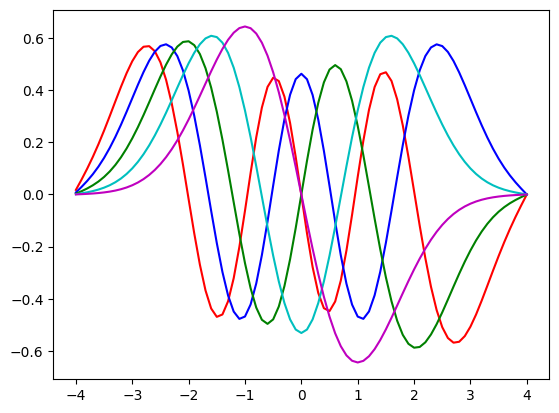

[ 3.00002654  5.00036577  7.0030761   9.01752976 11.07150962]
(5,)
[0.00025941 0.00100409 0.00306264 0.00781154 0.01747707]
[1.17150250e-09 6.94810549e-14 2.96355428e-13 4.43644148e-14
 6.58552766e-14]


In [132]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math


def oursystem(y, x, epsilon):
    return [y[1], (K * x**2 - epsilon) * y[0]]

tol = 1e-6 # define a tolerance level
col = ['r', 'b', 'g', 'c', 'm', 'k'] # eigenfunc colors
n0 = 9.3
L = 4
K = 1
xspan =  np.arange(-L, L + 0.1, 0.1)

def boundary_conditions(z0, zL, epsilon):
    left_bc = -z0[1] + np.sqrt(L**2 - epsilon) * z0[0]  # BC at x = -L
    right_bc = -zL[1] - np.sqrt(L**2 - epsilon) * zL[0]  # BC at x = L
    return [left_bc, right_bc]

A1 = np.zeros((len(xspan), 5))
A2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

epsilon_start = n0  # beginning value of beta

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start

    depsilon = 0.1  # default step size in beta

    for _ in range(1000):  # begin convergence loop for beta
        x0 = [.1, np.sqrt(L**2 - epsilon)]

        z = odeint(oursystem, x0, xspan, args=(epsilon,))

        z0 = z[0]  # Value at x = -L
        zL = z[-1]  # Value at x = L

        bc = boundary_conditions(z0, zL, epsilon)

        if abs(bc[1]) < tol:  # If the boundary condition is satisfied at x = L
            print("hi")
            break  # Convergence achieved

        # Get the boundary values based on the computed solution
        # boundary_values = boundary_conditions(z[-1], epsilon)

        # Check for convergence (boundary conditions)
        #if abs(boundary_values[0]) < tol and abs(boundary_values[1]) < tol:
        #if abs(-z[-1, 1] - math.sqrt(L**2 - epsilon) * z[-1,0] ) < tol:
        #    break  # Exit the convergence loop

        if (-1) ** (modes + 1) * z[-1, 0] > 0:
            epsilon -= depsilon
            #if_counter = if_counter.append(1)
            depsilon /= 2

        else:
            epsilon += depsilon
            #epsilon += depsilon / 2
            #depsilon /= 2

    print("Eigenvalue for mode ", modes, ": ", epsilon, " # of loops: ", _)

    norm = np.trapz(z[:, 0] * z[:, 0], xspan)  # calculate the normalization
    normalized_eigenfunction = z[:, 0] / np.sqrt(norm)

    # Store the normalized eigenfunction in the corresponding column of A1
    A1[:, modes - 1] = np.abs(normalized_eigenfunction)

    A2[modes - 1] = epsilon

    epsilon_start = epsilon - 1.9  # after finding eigenvalue, pick new start
    plt.plot(xspan, z[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes

plt.show()  # end mode loop
A1 = A1[:, [4, 3, 2, 1, 0]]
A2 = A2[[4, 3, 2, 1, 0]]
print(A2)
print(A2.shape)
print(A1[0, :])
print(A1[-1, :])